Owen Galinac

 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [66]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



In [67]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [ ]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

#reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)
R2_test = model_1.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(model_1.__dict__)

print(coef)
print(MSE_test)
print(R2_test)



{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 5, 'coef_': array([21.52476416, 21.0447652 , 95.89526884,  6.65896819, 49.20515152]), 'rank_': 5, 'singular_': array([17.14087565, 16.37959118, 15.55438107, 14.33062407, 13.89550251]), 'intercept_': -6.8846709442552125}
[21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]
85.50162291627633
0.99285183178066


#### Your written answers here

What are your model parameters?
 - Coefficients: 21.52476416, 21.0447652, 95.89526884, 6.65896819, 49.20515152
 - y int: -6.8846709442552125

What were your MSE and R^2?
 - MSE test: 85.50162291627633
 - R^2 test: 0.99285183178066



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


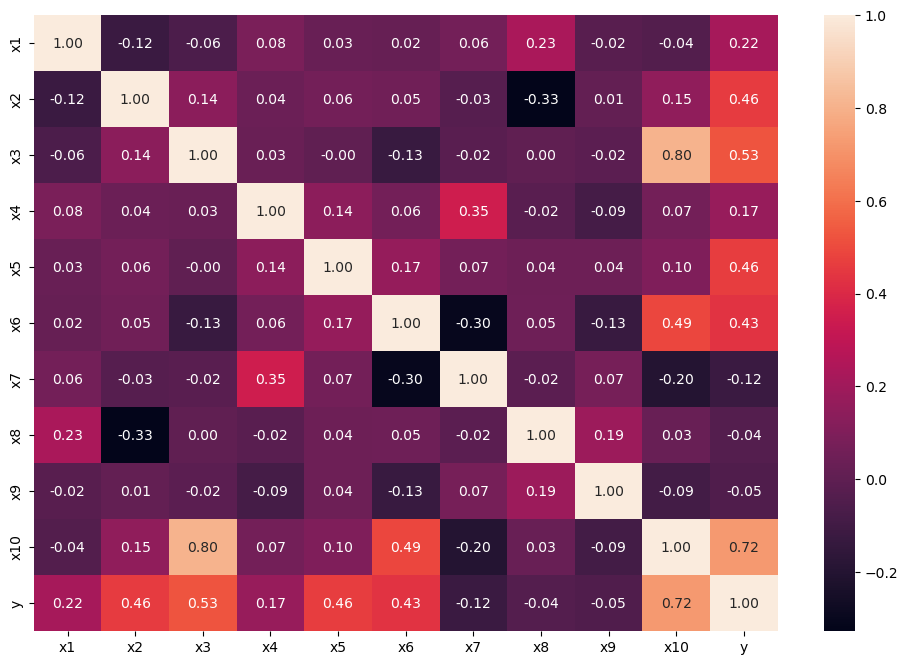

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 10, 'coef_': array([ 58.18798469,  70.60082141,  66.42926257,   9.62286651,
        55.34238284,  45.45833551, -10.6809141 ,  -1.93105161,
         1.37176175,  58.04089175]), 'rank_': 9, 'singular_': array([9.24819289e-01, 9.02253592e-01, 8.40518294e-01, 8.03072579e-01,
       7.64912894e-01, 6.72509526e-01, 5.71326503e-01, 5.20754110e-01,
       4.88593504e-01, 1.74276529e-16]), 'intercept_': -15.399103254030884}
[55.42830221 77.9306604  94.14545931 16.29427767 57.10651453 79.89553296
  0.          0.          0.          0.        ]
11.880644762826176
0.8731824118173616


In [70]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

corr_matrix = reg2_df.corr()
corr_matrix
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)
R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(model_1.__dict__)

print(coef)
print(MSE_test)
print(R2_test)

#### Your written answers here

What are your model parameters?
 - Coefficients: 58.18798469,  70.60082141,  66.42926257,   9.62286651, 55.34238284,  45.45833551, -10.6809141 ,  -1.93105161, 1.37176175,  58.04089175
 - intercept: -15.399103254030884

Which features (x1, x2...) were significant? Which were co-linear?
 - significant: x1, x2, x3, x4, x5, x6
 - Co-linear: x3 colinear with x10, x6 colinear with x10
 
What were your MSE and R^2?
 - MSE: 11.880644762826176
 - R^2: 0.8731824118173616



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [71]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns = ['id', 'date', 'zipcode'], inplace = True)
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


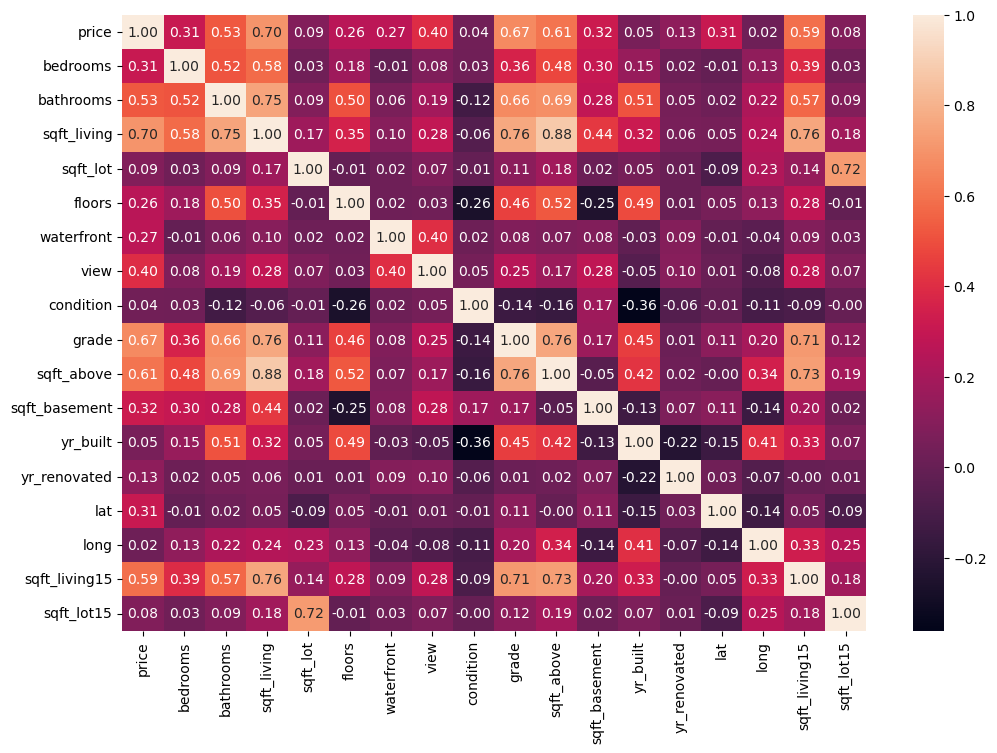

In [72]:
#correlation matrix

corr_matrix = housing_df.corr()
corr_matrix
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
sqft_living, grade, sqft_above. 
These are the 3 features with the highest correlation to price.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


model coefficients: [212117.54310366 128741.97187118 -64280.44641991], 539943.6588779641
R2_test = 0.55, R2_train = 0.54


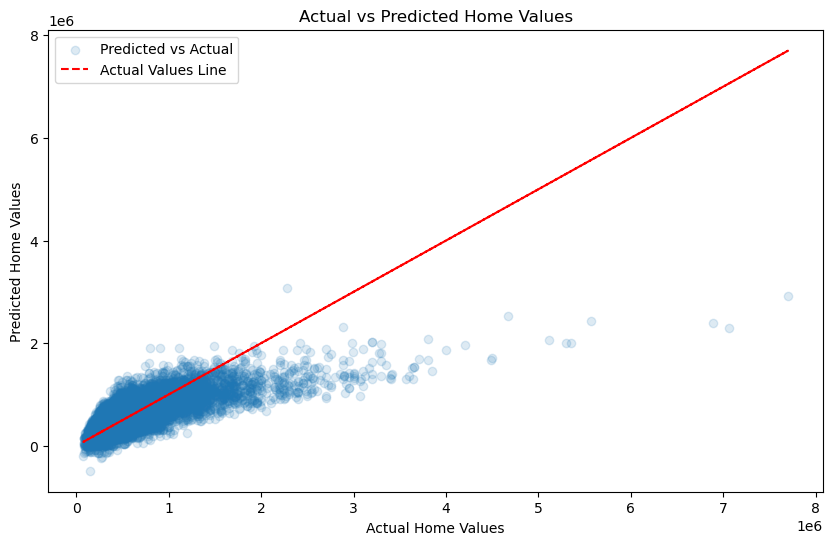

In [73]:

X = housing_df[['sqft_living', 'grade', 'sqft_above']]
y = housing_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

# Fit the model
model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

# Make predictions
y_pred_train = model_linreg.predict(X_scaled_train)
y_pred_test = model_linreg.predict(X_scaled_test)
y_pred = model_linreg.predict(ss.transform(X))

# Assess the model
R2_train = model_linreg.score(X_scaled_train, y_train)
R2_test = model_linreg.score(X_scaled_test, y_test)
print(f'model coefficients: {model_linreg.coef_}, {model_linreg.intercept_}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')


# Plotting the actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.15, label='Predicted vs Actual')
plt.plot(y, y, color='red', linestyle='--', label='Actual Values Line')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values')
plt.legend()
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - I used sqft_living, grade, and sqft_above. These were the 3 highest correlation values. They had high correlation with each other, but the other values were very lowly correlated so I figured the negative impact of intercorrelated features would be less than the impact of lowly correlated features in prediciton.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

                 Coefficient
yr_built       -36774.244637
bedrooms           -0.000000
long               -0.000000
yr_renovated        0.000000
sqft_basement       0.000000
sqft_above          0.000000
sqft_living15       0.000000
sqft_lot15         -0.000000
floors              0.000000
sqft_lot           -0.000000
bathrooms           0.000000
condition           0.000000
view            36379.707923
waterfront      36930.773832
lat             62626.545358
grade          105597.059594
sqft_living    153688.157414
R2_test = 0.65, R2_train = 0.67


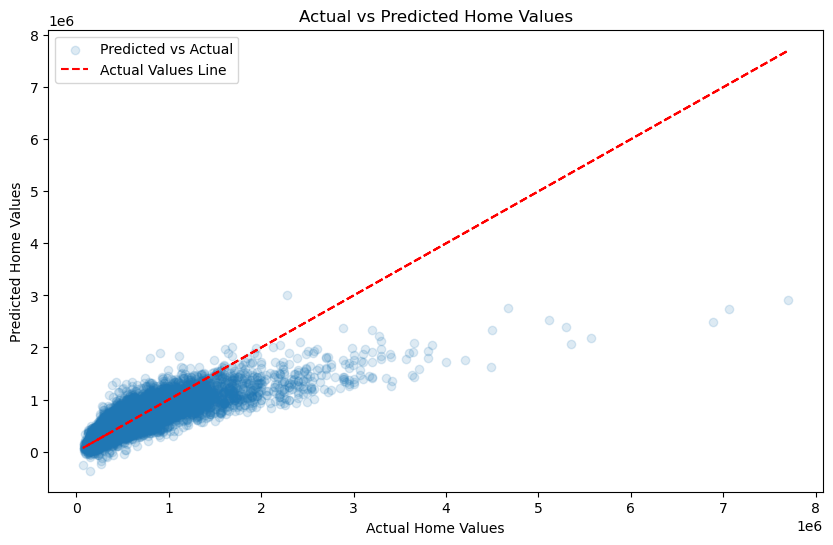

In [74]:
from sklearn.linear_model import Lasso, Ridge
X = housing_df.drop(columns=['price'])
y = housing_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

# Fit the Lasso model
lasso = Lasso(alpha=25000)
lasso.fit(X_scaled_train, y_train)

# Get the coefficients
feature_names = X.columns
coefficient_df = pd.DataFrame(lasso.coef_, index=feature_names, columns=['Coefficient'])
coefficient_df = coefficient_df.sort_values(by='Coefficient')
print(coefficient_df)

# Assess the model
y_pred_train = lasso.predict(X_scaled_train)
y_pred_test = lasso.predict(X_scaled_test)
y_pred = lasso.predict(ss.transform(X))

R2_train = lasso.score(X_scaled_train, y_train)
R2_test = lasso.score(X_scaled_test, y_test)

print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.15, label='Predicted vs Actual')
plt.plot(y, y, color='red', linestyle='--', label='Actual Values Line')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values')
plt.legend()
plt.show()

### Your written answers here
Which regression did you use?
 - Lasso Regression

Does your regularized model look better than your MLR? How so?
 - It does not visually seem much better, there is still a large deviation at the higher end prices. However, the R^2 value suggests that this model is better than my MLR, as it is over 0.1 higher.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [75]:
subMil_housing_df = housing_df[housing_df['price'] < 1000000]
overMil_housing_df = housing_df[housing_df['price'] >= 1000000]

                Coefficient
yr_built       -1166.743549
bedrooms           0.000000
long              -0.000000
yr_renovated       0.000000
sqft_basement      0.000000
sqft_above         0.000000
condition          0.000000
sqft_lot15         0.000000
waterfront         0.000000
floors             0.000000
sqft_lot           0.000000
bathrooms          0.000000
view            2009.983118
sqft_living15  13055.438795
grade          48301.752122
sqft_living    50658.946942
lat            57971.765699
0.5803150816542695


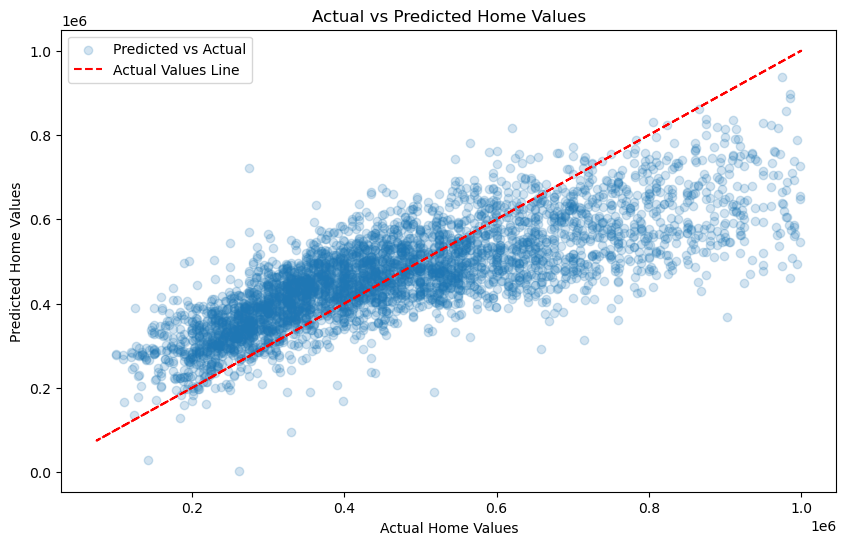

In [76]:

X = subMil_housing_df.drop(columns = ['price'])
y = subMil_housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

# Fit the Lasso model
lasso = Lasso(alpha=25000)
lasso.fit(X_scaled_train, y_train)

# Get the coefficients
feature_names = X.columns
coefficient_df = pd.DataFrame(lasso.coef_, index=feature_names, columns=['Coefficient'])
coefficient_df = coefficient_df.sort_values(by='Coefficient')
print(coefficient_df)

# Assess the model
y_pred_train = lasso.predict(X_scaled_train)
y_pred_test = lasso.predict(X_scaled_test)
y_pred = lasso.predict(ss.transform(X))

R2_train = lasso.score(X_scaled_train, y_train)

R2_test = lasso.score(X_scaled_test, y_test)

print(R2_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.2, label='Predicted vs Actual')
plt.plot(y, y, color='red', linestyle='--', label='Actual Values Line')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values')
plt.legend()
plt.show()



                 Coefficient
long          -131701.374484
yr_built       -57649.219318
floors         -20357.909054
bedrooms           -0.000000
yr_renovated        0.000000
sqft_basement       0.000000
condition           0.000000
sqft_lot15         -0.000000
sqft_lot           -0.000000
view             7022.563401
sqft_living15    9148.093831
lat             25810.383777
sqft_above      44140.068383
bathrooms       50957.060278
grade           69513.135425
waterfront     169924.944553
sqft_living    288723.166408
0.46023107799801877


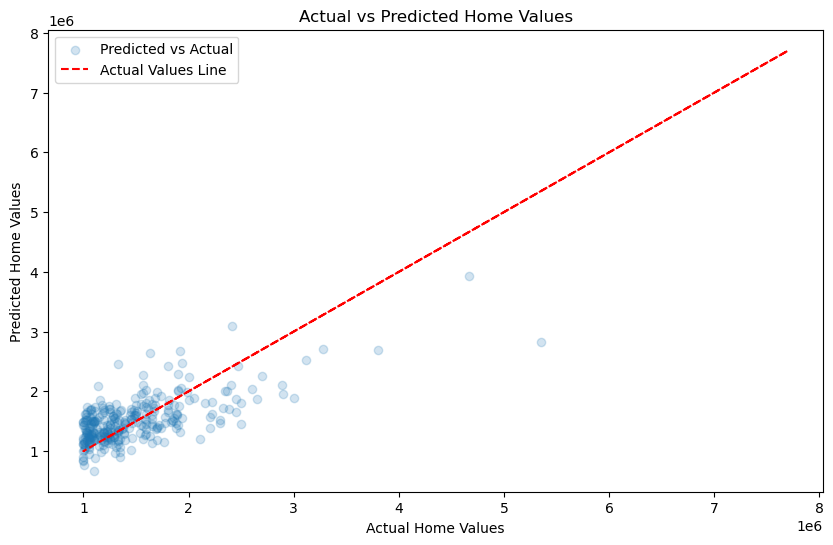

In [77]:
X = overMil_housing_df.drop(columns = ['price'])
y = overMil_housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

# Fit the Lasso model
lasso = Lasso(alpha=25000)  
lasso.fit(X_scaled_train, y_train)

feature_names = X.columns
coefficient_df = pd.DataFrame(lasso.coef_, index=feature_names, columns=['Coefficient'])
coefficient_df = coefficient_df.sort_values(by='Coefficient')
print(coefficient_df)

# Assess the model
y_pred_train = lasso.predict(X_scaled_train)
y_pred_test = lasso.predict(X_scaled_test)
y_pred = lasso.predict(ss.transform(X))

R2_train = lasso.score(X_scaled_train, y_train)
R2_test = lasso.score(X_scaled_test, y_test)

print(R2_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.2, label='Predicted vs Actual')
plt.plot(y, y, color='red', linestyle='--', label='Actual Values Line')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values')
plt.legend()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - 0.58 and 0.46 for the under 1 mil, and over 1 mil, respectively.
 
